# Text Classification on given Dataset

Given the Emotions_training.csv dataset, we have to perform Text Classification. 
Task 1: Data Preprocessing.
Task 2: Build Multiple models (at least 3 models as per mentor's requirement) 
Task 3: Comparing those models.


Text classification is a machine learning technique that assigns a set of predefined categories to open-ended text.

How Does Text Classification Work?

You can perform text classification in two ways:manual or automatic.

Manual text classification involves a human annotator, who interprets the content of text and categorizes it accordingly. This method can deliver good results but it’s time-consuming and expensive.

Automatic text classification applies machine learning, natural language processing (NLP), and other AI-guided techniques to automatically classify text in a faster, more cost-effective, and more accurate manner.

Choosing a model:
   - Traditional Machine Learning Models:
   
         1. Naive Bayes family of algorithms
         2. support vector machines (SVM)
         3. Logistic Regression
         4. Random Forests
    

##  Importing Libraries

In [1]:
import pandas as pd #required to read the data present in the form of csv file
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer # This library is required bcoz the data is in the form of textual data and needed to convert into numerical data
from sklearn.model_selection import train_test_split # for dividing the data into training and testing part
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics # to calculate accuracy, precision, recall, generate confusion matrix as well as classification reports

from collections import Counter # Counter class helps in performing counting elements
# The Counter class is especially useful in the context of class imbalance for counting the occurrences of each class label in a dataset.


In [2]:
df = pd.read_csv('Emotions_training.csv')

In [3]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

###  1. Data Preprocessing

####  Lower Case

In [6]:
df['text'] = df['text'].str.lower()

#### Remove Links

In [7]:
df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ')

C:\Users\sansk\AppData\Local\Temp\ipykernel_12232\2808825825.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ')


#### Remove next lines

In [8]:
df['text'] = df['text'].str.replace('\n',' ')

#### Remove Words containing numbers

In [9]:
df['text'] = df['text'].str.replace('\d+','') 

C:\Users\sansk\AppData\Local\Temp\ipykernel_12232\1176194866.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+','')


#### Extra spaces

In [10]:
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))

#### Special Characters

In [11]:
def remove_specialchar(line):
   return re.sub(r'[^\w\s]','',line) 
df['text'] = df['text'].apply(remove_specialchar)

#### Removal of stop words

In [12]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
    tokens = word_tokenize(sentence)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)
    
df['text'] = df['text'].apply(remove_stopwords)

#### Stemming

In [13]:
stemmer = PorterStemmer()

def stemming(words):
    tokens = word_tokenize(words)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

df['text'] = df['text'].apply(stemming)

#### Lemmatization

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sansk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['text'] = df['text'].apply(lemmatization)

### Focusing on 2nd Column: Label

### Checking whether the dataset is Class imbalance or not 

#### Step 1: Frequency Count:

In [16]:
df['label'].unique() # Checking unique labels

array([0, 3, 2, 5, 4, 1], dtype=int64)

In [17]:
counts = Counter(df['label'])
print(counts)

Counter({1: 5362, 0: 4666, 3: 2159, 4: 1937, 2: 1304, 5: 572})


#### Step 2: Visualize the Distribution:

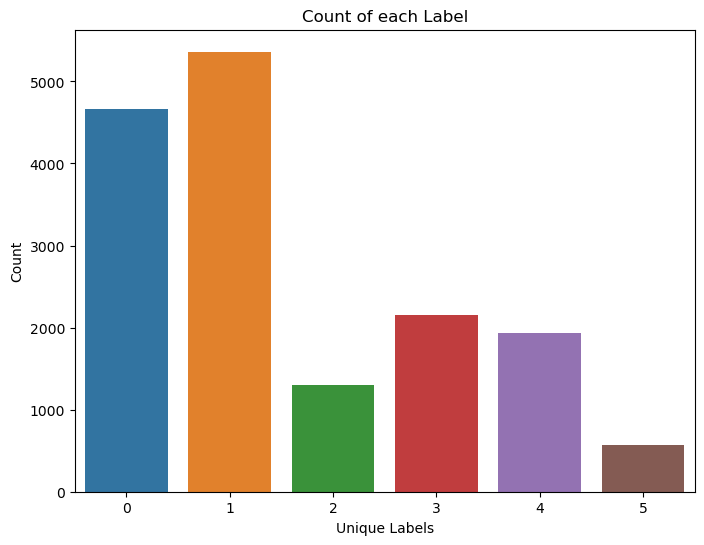

In [18]:
# Create barplot which will represent each label's value_counts()
plt.figure(figsize = (8,6))
sns.countplot(x = 'label', data = df)
plt.xlabel('Unique Labels')
plt.ylabel('Count')
plt.title('Count of each Label')
plt.show()

#### Step 3: Calculate Imbalance Ratios:
One simple way to measure imbalance is to calculate the ratio of the number of instances of the minority class to the majority class.

In [19]:
# Identify the majority and minority classes
majority_class_count = max(counts.values())
minority_class_count = min(counts.values())

# Calculate imbalance ratio
imbalance_ratio = minority_class_count / majority_class_count
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


Imbalance Ratio: 0.11


If the imbalance ratio is 0.11, it means that for every instance in the majority class, there are only 0.11 instances in the minority class.
i.e. for 9 majority class instances, there is 1 minority class instance

An imbalance ratio of 0.11 specifies that the dataset is highly imbalanced, with the minority class being significantly underrepresented compared to the majority class.

### Train - Test Split

Dividing the dataset into train and test part.
The train test split expects minimum two parameters (instances and target label). Along with this we can also pass two more parameters (test size(percent of data to go for testing), random state(I want the same data to go for training and testing))

xtrain = training instances

xtest =  testing instances

ytrain = associated target label for xtrain

ytest = associated labelss for xtest

Splitting the Data

Typically, the dataset is split into these four sets to achieve two main goals:

Training the Model (x_train, y_train): The model learns the patterns in the data using the training set.

Testing the Model (x_test, y_test): The model’s performance is evaluated using the testing set to ensure it can generalize to new, unseen data.

By carefully splitting the data into training and testing sets, you can better understand how your model will perform in real-world scenarios and ensure that it doesn’t just memorize the training data but can make accurate predictions on new, unseen data.

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(df['text'], df['label'], test_size = 0.3, random_state = 2)

### Vectorization
We are using TFidf Vectorizer to convert this textual data into numerical data.
By creating an instance first for the Tfidf vectorizer and then by using fit_transform function,conversion happens.
We extract the features from Tfidf Vectorizer

In [78]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(xtrain)
X_test_tfidf = vectorizer.transform(xtest)
y = df['label']

### Naive Bayes (NB) Classifier:

Naive Bayes is a well-liked text categorization technique because it is straightforward and effective. Because it can handle high-dimensional and sparse data, which is typical in text data, it is especially well suited for text classification tasks.

Based on the Bayes theorem, which determines the likelihood that a hypothesis is true given the observed evidence.

The Naive Bayes theorem is a statistical procedure that determines the likelihood that an event will occur given the occurrence of another event under the assumption that each attribute is independent of the others.

In [73]:
# xtrain and ytrain are passed to MultinomialNB using fit function
# when passed training data to MultinomialNB ,it will create a classifier
clf = MultinomialNB().fit(xtrain,ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

### Calculation of metrics:

#### 1. Accuracy of Classifier:

In [74]:
nb_training_accuracy = metrics.accuracy_score(ytrain,ytrain_pred)
nb_test_accuracy = metrics.accuracy_score(ytest,ytest_pred)
print("Train Accuracy: ",nb_training_accuracy)
print("Test Accuracy: ",nb_test_accuracy)

Train Accuracy:  0.7158035714285714
Test Accuracy:  0.6470833333333333


#### 2. Confusion Matrix:

The confusion matrix is a table that is often used to describe the performance of a classification model. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class. The entries in the matrix show the number of times the model's predictions match the actual labels (diagonal elements) and the number of times they do not match (off-diagonal elements).

True Positives (TP): The count of correct predictions for the positive class.

True Negatives (TN): The count of correct predictions for the negative class.

False Positives (FP): The count of incorrect predictions where the model predicted positive but the actual class is negative.

False Negatives (FN): The count of incorrect predictions where the model predicted negative but the actual class is positive.

In [75]:
conf_matrix_train = metrics.confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix for Training data:\n",conf_matrix_train)

Confusion Matrix for Training data:
 [[3190  109    0    0    2    0]
 [  58 3694    0    0    0    0]
 [ 136  690   79    0    0    0]
 [ 436  439    0  623    7    0]
 [ 390  513    0   18  429    0]
 [ 120  250    0    0   15    2]]


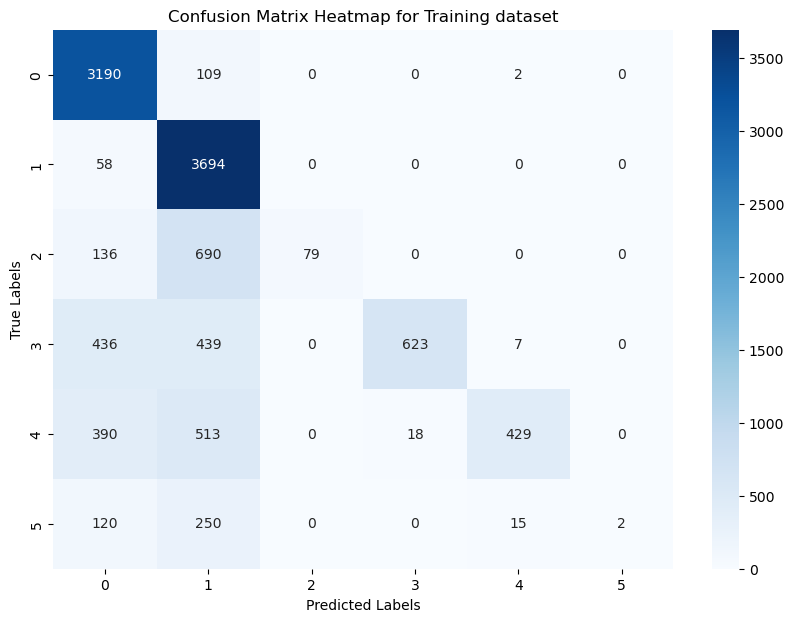

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Training dataset')
plt.show()

In [26]:
conf_matrix_test = metrics.confusion_matrix(ytest,ytest_pred)
print("Confusion Matrix for Testing data:\n",conf_matrix_test)

Confusion Matrix for Testing data:
 [[1242  122    0    1    0    0]
 [  65 1544    0    0    1    0]
 [  52  320   23    2    2    0]
 [ 235  245    0  172    2    0]
 [ 229  228    0    5  125    0]
 [  55  122    0    0    8    0]]


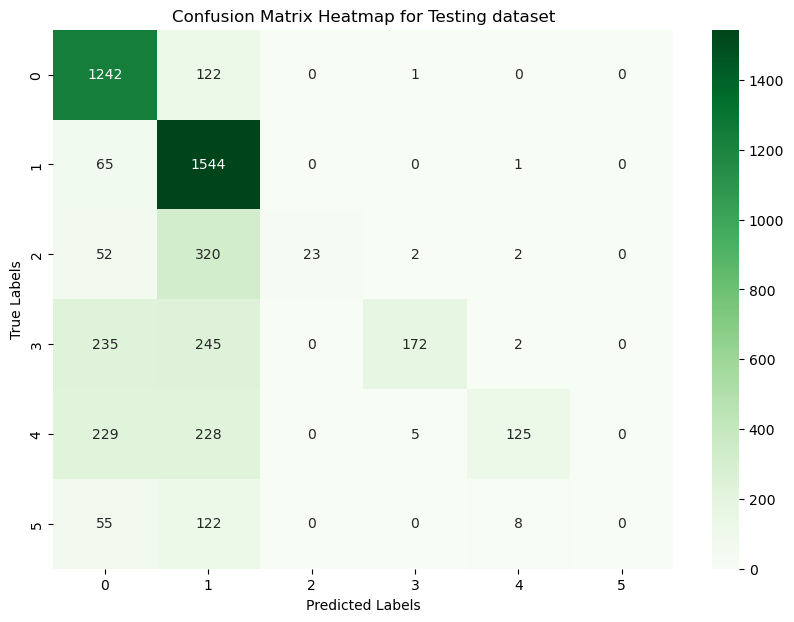

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Testing dataset')
plt.show()

#### 3. Precision:

Precision in Multiclass Classification:

For multiclass classification, precision can be calculated for each class individually and then averaged (using either a macro or micro average) to get an overall measure.

Macro-Averaged Precision: Computes precision for each class independently and then takes the average.

Micro-Averaged Precision: Aggregates the contributions of all classes to compute the average precision.

In [28]:
print(metrics.precision_score(ytrain,ytrain_pred, average = 'weighted',zero_division = 0))

0.7945378033936671


In [29]:
print(metrics.precision_score(ytest,ytest_pred, average = 'weighted',zero_division = 0))

0.7128121730882743


In multiclass classification, you can choose among different averaging methods:

micro: Calculate metrics globally by counting the total true positives, false negatives, and false positives.

macro: Calculate metrics for each label and find their unweighted mean. This does not take label imbalance into account.

weighted: Calculate metrics for each label and find their average weighted by support (the number of true instances for each label). This accounts for label imbalance.

#### 4. Recall:

In [30]:
print(metrics.recall_score(ytest,ytest_pred, average = 'weighted'))

0.6470833333333333


#### 5. F1 score:

In [31]:
print(metrics.f1_score(ytest,ytest_pred, average = 'weighted'))

0.572389447212588


#### 6. Classification Report:

In [32]:
print("Classification report for Training data: \n",metrics.classification_report(ytrain,ytrain_pred, zero_division = 0))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       0.74      0.97      0.84      3301
           1       0.65      0.98      0.78      3752
           2       1.00      0.09      0.16       905
           3       0.97      0.41      0.58      1505
           4       0.95      0.32      0.48      1350
           5       1.00      0.01      0.01       387

    accuracy                           0.72     11200
   macro avg       0.88      0.46      0.47     11200
weighted avg       0.79      0.72      0.66     11200



In [33]:
print("Classification report for Testing data: \n",metrics.classification_report(ytest,ytest_pred, zero_division = 0))

Classification report for Testing data: 
               precision    recall  f1-score   support

           0       0.66      0.91      0.77      1365
           1       0.60      0.96      0.74      1610
           2       1.00      0.06      0.11       399
           3       0.96      0.26      0.41       654
           4       0.91      0.21      0.34       587
           5       0.00      0.00      0.00       185

    accuracy                           0.65      4800
   macro avg       0.69      0.40      0.39      4800
weighted avg       0.71      0.65      0.57      4800



Precision: The ratio of correctly predicted positive observations to the total predicted positives.

Recall: The ratio of correctly predicted positive observations to all observations in the actual class.

F1-score: The weighted average of Precision and Recall.

Support: The number of actual occurrences of the class in the specified dataset.

### Linear Support Vector Machine

In [34]:
# Train the Linear SVM Model
svm_clf = SVC(kernel = 'linear')
svm_clf.fit(xtrain,ytrain)
# Make Predictions
ytrain_pred = svm_clf.predict(xtrain)
ytest_pred = svm_clf.predict(xtest)

#### Calculation of metrics:
1. Accuracy
2. Confusion Matrix
3. Precision
4. Recall
5. F1 Score
6. Classification Report

In [35]:
svm_training_accuracy = metrics.accuracy_score(ytrain,ytrain_pred)
svm_test_accuracy = metrics.accuracy_score(ytest,ytest_pred)
print("Train Accuracy: ",svm_training_accuracy)
print("Test Accuracy: ",svm_test_accuracy)

Train Accuracy:  0.9459821428571429
Test Accuracy:  0.8427083333333333


In [36]:
conf_matrix_train = metrics.confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix for Training data:\n",conf_matrix_train)

conf_matrix_test = metrics.confusion_matrix(ytest,ytest_pred)
print("Confusion Matrix for Testing data:\n",conf_matrix_test)

Confusion Matrix for Training data:
 [[3191   37    6   30   32    5]
 [  54 3615   38   16   15   14]
 [  17  125  756    5    2    0]
 [  53   21    3 1416    9    3]
 [  30    7    5   33 1266    9]
 [   2    5    1    1   27  351]]
Confusion Matrix for Testing data:
 [[1233   56   10   35   23    8]
 [  51 1464   41   18   20   16]
 [  17  145  228    5    4    0]
 [  67   43    5  528   10    1]
 [  32   37    4   27  479    8]
 [   7   24    0    0   41  113]]


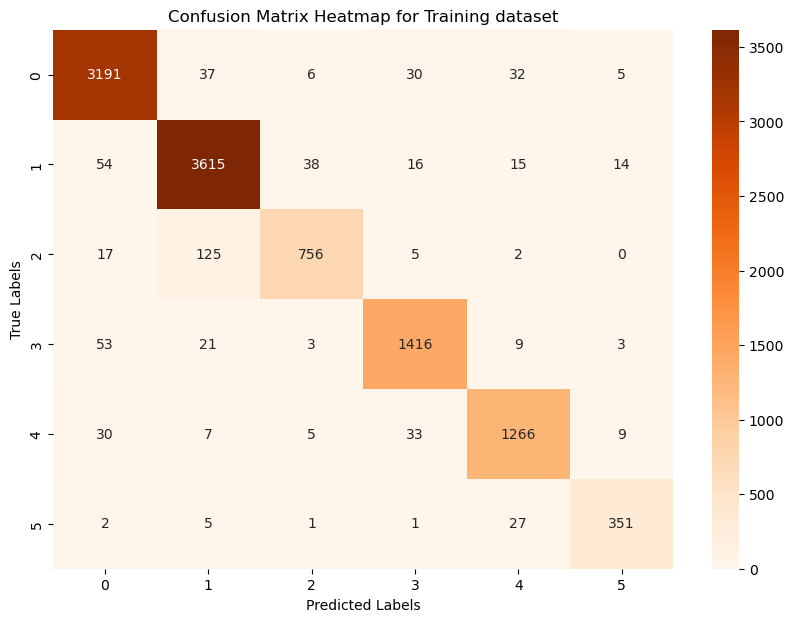

In [37]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Training dataset')
plt.show()

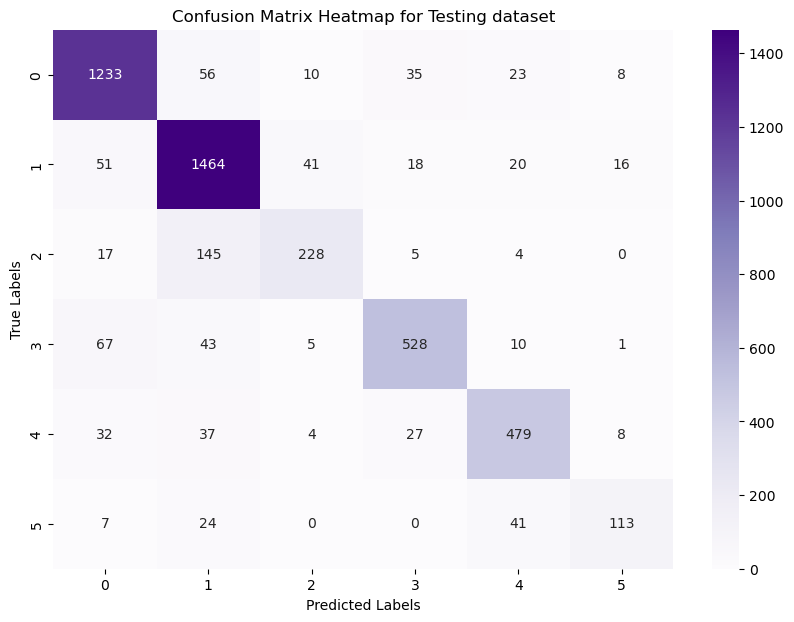

In [38]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Testing dataset')
plt.show()

In [39]:
print("Classification report for Training data: \n",metrics.classification_report(ytrain,ytrain_pred, zero_division = 0))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3301
           1       0.95      0.96      0.96      3752
           2       0.93      0.84      0.88       905
           3       0.94      0.94      0.94      1505
           4       0.94      0.94      0.94      1350
           5       0.92      0.91      0.91       387

    accuracy                           0.95     11200
   macro avg       0.94      0.93      0.93     11200
weighted avg       0.95      0.95      0.95     11200



In [40]:
print("Classification report for Testing data: \n",metrics.classification_report(ytest,ytest_pred, zero_division = 0))

Classification report for Testing data: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1365
           1       0.83      0.91      0.87      1610
           2       0.79      0.57      0.66       399
           3       0.86      0.81      0.83       654
           4       0.83      0.82      0.82       587
           5       0.77      0.61      0.68       185

    accuracy                           0.84      4800
   macro avg       0.83      0.77      0.79      4800
weighted avg       0.84      0.84      0.84      4800



### Logistic Regression

In [41]:
# Train the Logistic Regression Model
lg_clf = LogisticRegression(multi_class = 'ovr', solver = 'liblinear')
lg_clf.fit(xtrain,ytrain)
# Make Predictions
ytrain_pred = lg_clf.predict(xtrain)
ytest_pred = lg_clf.predict(xtest)

In [42]:
lg_training_accuracy = metrics.accuracy_score(ytrain,ytrain_pred)
lg_test_accuracy = metrics.accuracy_score(ytest,ytest_pred)
print("Train Accuracy: ",lg_training_accuracy)
print("Test Accuracy: ",lg_test_accuracy)

Train Accuracy:  0.8933928571428571
Test Accuracy:  0.808125


In [43]:
conf_matrix_train = metrics.confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix for Training data:\n",conf_matrix_train)

conf_matrix_test = metrics.confusion_matrix(ytest,ytest_pred)
print("Confusion Matrix for Testing data:\n",conf_matrix_test)

Confusion Matrix for Training data:
 [[3170   80    5   25   20    1]
 [  66 3634   32    7    6    7]
 [  56  266  570    8    5    0]
 [ 106  100    4 1284   10    1]
 [  75   88    6   29 1142   10]
 [  43   82    3    4   49  206]]
Confusion Matrix for Testing data:
 [[1255   75    4   22    9    0]
 [  48 1520   19    9   10    4]
 [  27  197  165    5    5    0]
 [  87   86    5  467    9    0]
 [  66   89    4   18  402    8]
 [  33   53    0    1   28   70]]


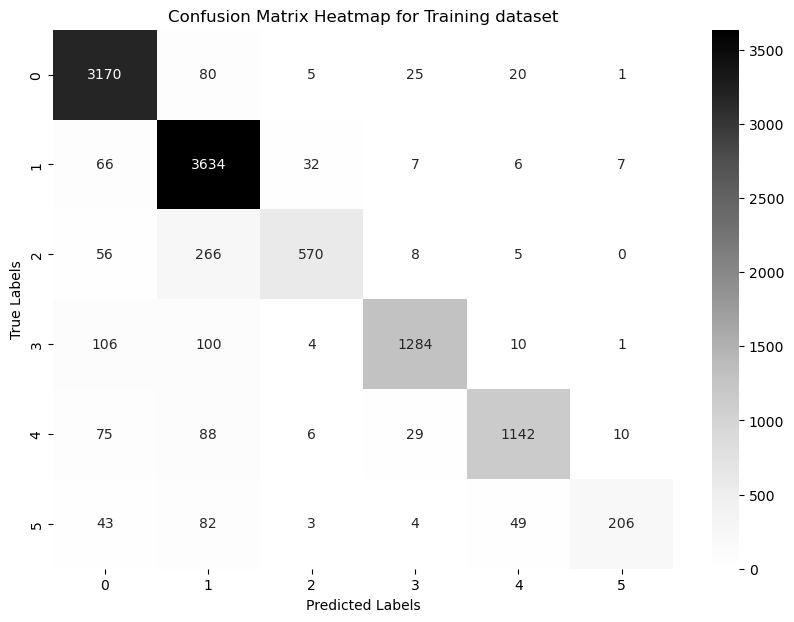

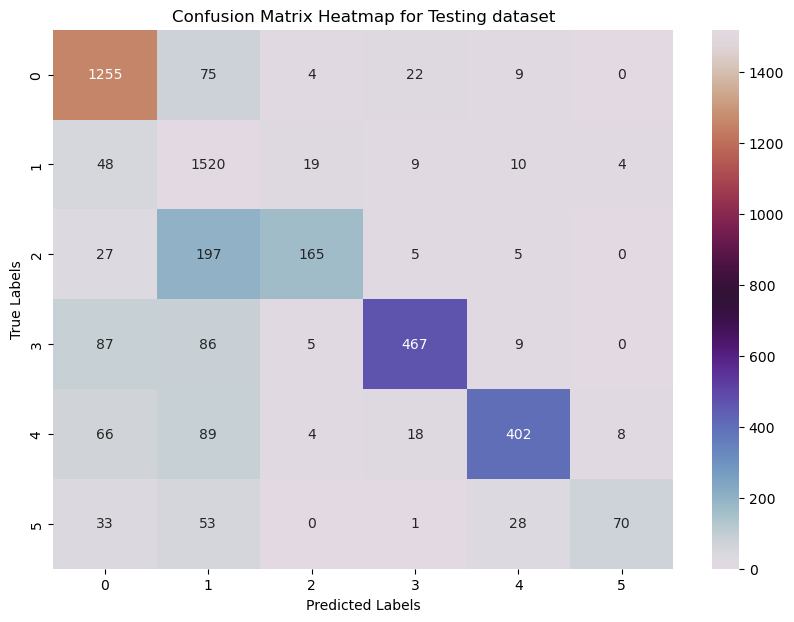

In [44]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Training dataset')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='twilight')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Testing dataset')
plt.show()

In [45]:
print("Classification report for Training data: \n",metrics.classification_report(ytrain,ytrain_pred, zero_division = 0))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      3301
           1       0.86      0.97      0.91      3752
           2       0.92      0.63      0.75       905
           3       0.95      0.85      0.90      1505
           4       0.93      0.85      0.88      1350
           5       0.92      0.53      0.67       387

    accuracy                           0.89     11200
   macro avg       0.91      0.80      0.84     11200
weighted avg       0.90      0.89      0.89     11200



In [46]:
print("Classification report for Testing data: \n",metrics.classification_report(ytest,ytest_pred, zero_division = 0))

Classification report for Testing data: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1365
           1       0.75      0.94      0.84      1610
           2       0.84      0.41      0.55       399
           3       0.89      0.71      0.79       654
           4       0.87      0.68      0.77       587
           5       0.85      0.38      0.52       185

    accuracy                           0.81      4800
   macro avg       0.84      0.68      0.72      4800
weighted avg       0.82      0.81      0.80      4800



### Random Forest Classifier

In [47]:
# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(xtrain,ytrain)
# Make Predictions
ytrain_pred = rf_clf.predict(xtrain)
ytest_pred = rf_clf.predict(xtest)

In [48]:
rf_training_accuracy = metrics.accuracy_score(ytrain,ytrain_pred)
rf_test_accuracy = metrics.accuracy_score(ytest,ytest_pred)
print("Train Accuracy: ",rf_training_accuracy)
print("Test Accuracy: ",rf_test_accuracy)

Train Accuracy:  0.9984821428571429
Test Accuracy:  0.8470833333333333


In [53]:
conf_matrix_train = metrics.confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix for Training data:\n",conf_matrix_train)

conf_matrix_test = metrics.confusion_matrix(ytest,ytest_pred)
print("Confusion Matrix for Testing data:\n",conf_matrix_test)

Confusion Matrix for Training data:
 [[3298    0    0    1    2    0]
 [   0 3749    3    0    0    0]
 [   0    3  902    0    0    0]
 [   1    0    0 1502    2    0]
 [   0    0    0    2 1345    3]
 [   0    0    0    0    0  387]]
Confusion Matrix for Testing data:
 [[1177   71   22   53   35    7]
 [  47 1443   53   26   24   17]
 [   5  121  261    6    5    1]
 [  42   28    7  566   11    0]
 [  28   27    2   25  486   19]
 [   5   16    0    1   30  133]]


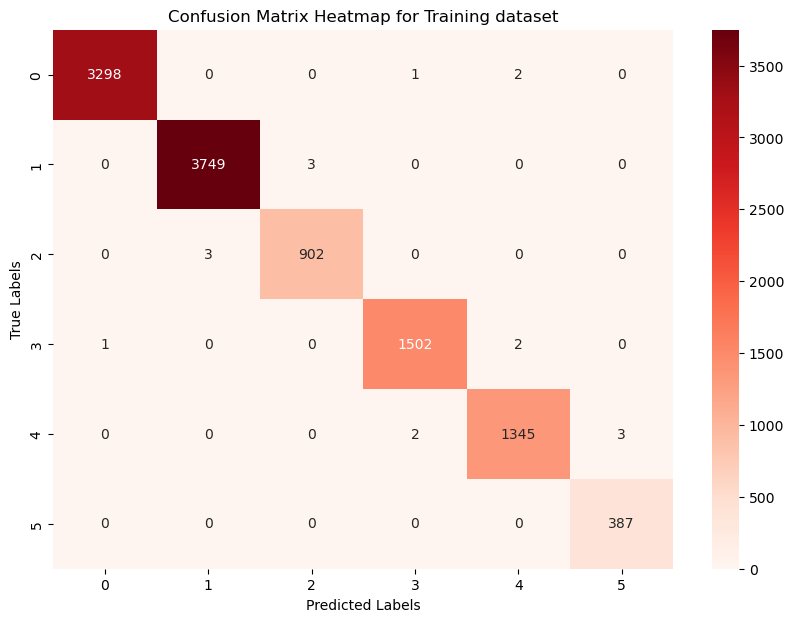

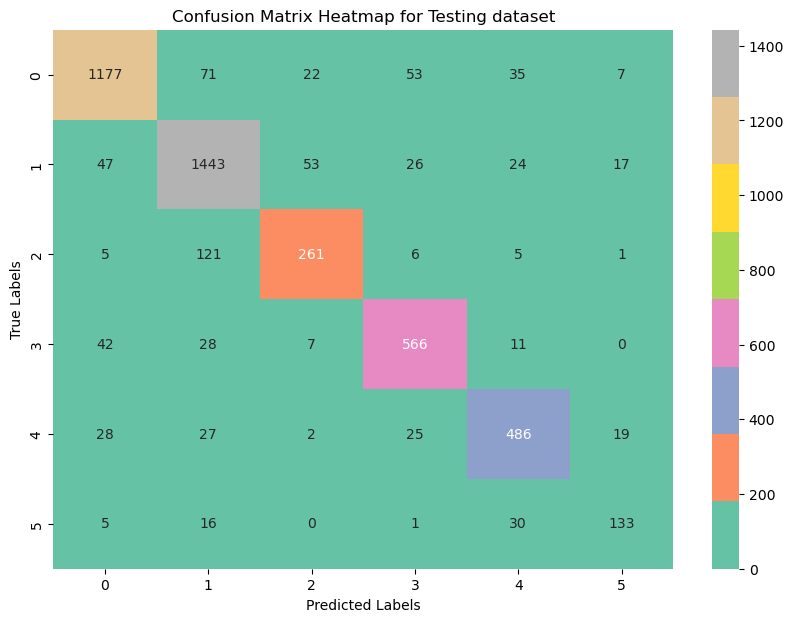

In [54]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Training dataset')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Set2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Testing dataset')
plt.show()

In [55]:
print("Classification report for Training data: \n",metrics.classification_report(ytrain,ytrain_pred, zero_division = 0))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3301
           1       1.00      1.00      1.00      3752
           2       1.00      1.00      1.00       905
           3       1.00      1.00      1.00      1505
           4       1.00      1.00      1.00      1350
           5       0.99      1.00      1.00       387

    accuracy                           1.00     11200
   macro avg       1.00      1.00      1.00     11200
weighted avg       1.00      1.00      1.00     11200



In [56]:
print("Classification report for Testing data: \n",metrics.classification_report(ytest,ytest_pred, zero_division = 0))

Classification report for Testing data: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1365
           1       0.85      0.90      0.87      1610
           2       0.76      0.65      0.70       399
           3       0.84      0.87      0.85       654
           4       0.82      0.83      0.83       587
           5       0.75      0.72      0.73       185

    accuracy                           0.85      4800
   macro avg       0.82      0.80      0.81      4800
weighted avg       0.85      0.85      0.85      4800



### XGBoost Algorithm

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
# Train the XGBoost Classifier
xgb_clf = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(ytrain)), random_state=42)
xgb_clf.fit(xtrain,ytrain)
# Make Predictions
ytrain_pred = xgb_clf.predict(xtrain)
ytest_pred = xgb_clf.predict(xtest)

In [59]:
xgb_training_accuracy = metrics.accuracy_score(ytrain,ytrain_pred)
xgb_test_accuracy = metrics.accuracy_score(ytest,ytest_pred)
print("Train Accuracy: ",xgb_training_accuracy)
print("Test Accuracy: ",xgb_test_accuracy)

Train Accuracy:  0.9498214285714286
Test Accuracy:  0.848125


In [60]:
conf_matrix_train = metrics.confusion_matrix(ytrain,ytrain_pred)
print("Confusion Matrix for Training data:\n",conf_matrix_train)

conf_matrix_test = metrics.confusion_matrix(ytest,ytest_pred)
print("Confusion Matrix for Testing data:\n",conf_matrix_test)

Confusion Matrix for Training data:
 [[3128   94    5   44   28    2]
 [  22 3633   61   13   13   10]
 [   6   74  820    3    1    1]
 [  29   54    3 1410    9    0]
 [  16   34    0   20 1271    9]
 [   0    6    0    0    5  376]]
Confusion Matrix for Testing data:
 [[1164  103   13   50   28    7]
 [  28 1453   69   21   21   18]
 [   4   98  284    7    5    1]
 [  33   55    5  546   13    2]
 [  15   41    3   17  484   27]
 [   4   16    1    0   24  140]]


In [61]:
print("Classification report for Training data: \n",metrics.classification_report(ytrain,ytrain_pred, zero_division = 0))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      3301
           1       0.93      0.97      0.95      3752
           2       0.92      0.91      0.91       905
           3       0.95      0.94      0.94      1505
           4       0.96      0.94      0.95      1350
           5       0.94      0.97      0.96       387

    accuracy                           0.95     11200
   macro avg       0.95      0.95      0.95     11200
weighted avg       0.95      0.95      0.95     11200



In [62]:
print("Classification report for Testing data: \n",metrics.classification_report(ytest,ytest_pred, zero_division = 0))

Classification report for Testing data: 
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      1365
           1       0.82      0.90      0.86      1610
           2       0.76      0.71      0.73       399
           3       0.85      0.83      0.84       654
           4       0.84      0.82      0.83       587
           5       0.72      0.76      0.74       185

    accuracy                           0.85      4800
   macro avg       0.82      0.81      0.82      4800
weighted avg       0.85      0.85      0.85      4800



In [83]:
results = {}
models = ['Naive Bayes','Logistic Regression','SVM','XGBoost']
accuracy = [0.72, 0.89, 0.95, 0.95]
precision = [0.79, 0.90, 0.95, 0.95]
recall = [0.72, 0.89, 0.95,0.95]
f1_score = [0.66, 0.89, 0.95,0.95]

for model, acc, prec, rec, f1 in zip(models, accuracy, precision, recall, f1_score):
    results[model] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    }
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Naive Bayes,0.72,0.79,0.72,0.66
Logistic Regression,0.89,0.90,0.89,0.89
SVM,0.95,0.95,0.95,0.95
XGBoost,0.95,0.95,0.95,0.95


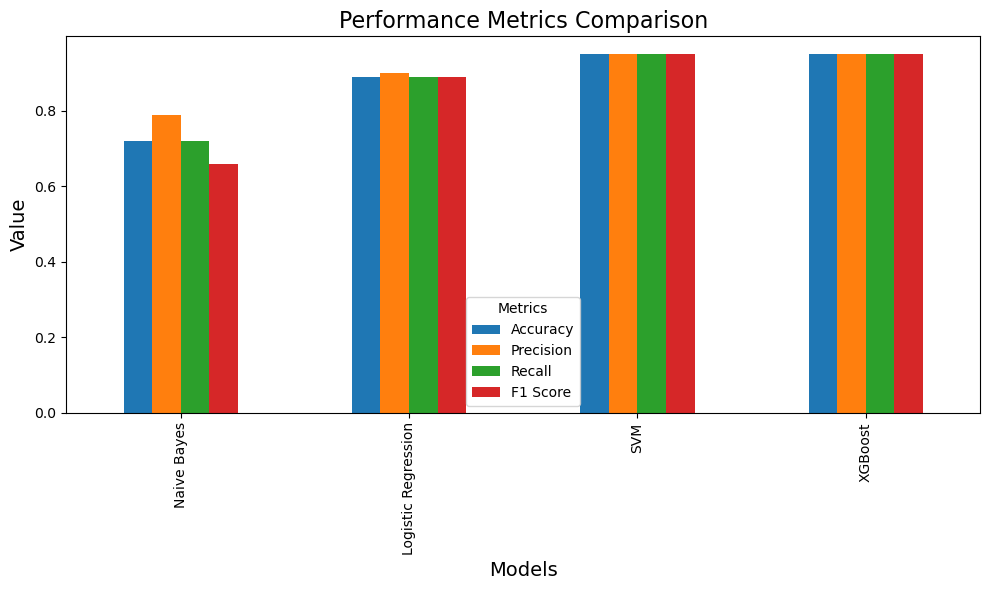

In [89]:
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics Comparison', fontsize = 16)
plt.ylabel('Value', fontsize = 14)
plt.xlabel('Models', fontsize = 14)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()